<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Project</font><br>
        <hr />
        <font size=3>810100283: <a href="mailto:nadib1998@gmail.com">Navid Adib</a><br></font><br>
    </div>
</div>

In [2]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import plotnine as p9 
import seaborn as sns
import regex as re

# بخش دوم crawler

### single page:

In [52]:
def oneProductExtractInfo(link,headers):

    url = 'https://www.amazon.in'+link
    # get request
    html = requests.get(url,headers=headers).text
    # parsing with beautifulSoup
    bs = BeautifulSoup(html,'lxml')

    return extract_info(bs)
    


def extract_info(bs):
    info = {}
    info['title'] = (bs.find('span',id='productTitle').text)[8::]
    infoTitles = [temp.text for temp in bs.find_all('span',class_="a-size-base a-text-bold")][2::]
    infoValues = [temp.text for temp in bs.find_all('span',class_="a-size-base po-break-word")]
    if not (len(infoTitles)== len(infoValues)):
        print('error different size of tabel')
        return info
    technicalDetailsTitles = [temp.text for temp in bs.find_all('th',class_="a-color-secondary a-size-base prodDetSectionEntry")]
    technicalDetailsValues = [temp.text for temp in bs.find_all('td',class_="a-size-base prodDetAttrValue")]
    try:
        i = infoTitles.index('Brand')
        info["brand"] = infoValues[i]
    except:
        info["brand"] = ''
    
    try:
        i = infoTitles.index('Colour')
        info["colour"] = infoValues[i]
    except:
        info["colour"] = ''

    try:
        i = infoTitles.index('Connectivity Technology')
        info['connectivityTechnology'] = infoValues[i]
    except:
        info["connectivityTechnology"] = ''

    try:
        i = infoTitles.index('Special Feature')
        info["specialFeature"] = infoValues[i]
    except:
        info["specialFeature"] = ''

    try:
        i = infoTitles.index('Movement Detection Technology')
        info["movementDetectionTechnology"] = infoValues[i]
    except:
        info["movementDetectionTechnology"] = ''

    try:
        i = infoTitles.index('Number of Items')
        info["numberOfItems"] = infoValues[i]
    except:
        info["numberOfItems"] = ''
    try:
        info['price'] = bs.find('span',class_='a-price-whole').text
    except:
        info['price']=''

    try:
        i = technicalDetailsTitles.index(' Item Weight ')
        info["weight"] = technicalDetailsValues[i][18::]
    except:
        info["weight"] = ''
    try:
        i = technicalDetailsTitles.index(' Country of Origin ')
        info["country"] = technicalDetailsValues[i][18::]
    except:
        info["country"] = ''
    
    return info



### crawling page
#### 1 page by page (click on next button)
#### 2 link by link in a single page
#### 3 run previous function for single page

In [57]:
data = []

url = 'https://www.amazon.in/s?k=mouse&qid=1674070039&sprefix=mouse%2Caps%2C709&ref=sr_pg_200'
# headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
headers = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36'})
# headers = ({'User-Agent':'Mozilla/3.0 (Windows 11.0; Win32; x32) AppleWebKit/53 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'})
html = requests.get(url,headers=headers).text
bs = BeautifulSoup(html,'lxml')

for i in range(0,10): # number of page to crawl
    print('------------- page '+str(i)+ ' -------------')
    print()
    try:
        next_link = 'https://www.amazon.in' + bs.find("a",
            class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator")['href']

        html = requests.get(next_link,headers=headers).text
        bs = BeautifulSoup(html,'lxml')
        links = [temp['href'] for temp in bs.find_all('a',class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal')]
        
        for id , link in enumerate(links):
            data.append(oneProductExtractInfo(link,headers))
            if( id%15 == 0):
                print('link '+str(id) + ' of page ' + str(i) +' processed')
                #print(oneProductExtractInfo(link,headers))
    except:
        print('something wrong ...')

df = pd.DataFrame(data)
df.to_csv('df-mouse7.csv')
df.tail()

------------- page 0 -------------

link 0 of page 0 processed
link 15 of page 0 processed
error different size of tabel
------------- page 1 -------------

link 0 of page 1 processed
link 15 of page 1 processed
------------- page 2 -------------

link 0 of page 2 processed
link 15 of page 2 processed
------------- page 3 -------------

link 0 of page 3 processed
link 15 of page 3 processed
error different size of tabel
error different size of tabel
------------- page 4 -------------

link 0 of page 4 processed
link 15 of page 4 processed
error different size of tabel
error different size of tabel
------------- page 5 -------------

link 0 of page 5 processed
error different size of tabel
link 15 of page 5 processed
------------- page 6 -------------

link 0 of page 6 processed
error different size of tabel
link 15 of page 6 processed
------------- page 7 -------------

link 0 of page 7 processed
error different size of tabel
link 15 of page 7 processed
error different size of tabel
--

,title,brand,colour,connectivityTechnology,specialFeature,movementDetectionTechnology,numberOfItems,price,weight,country
234,Ant Value FKAPU03 1000 DPI Wireless Mouse - Ro...,,,,,,,269.,,
235,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Amazon Basics,Black,USB,"Wireless, Lightweight, Ergonomic Design",Optical,,499.,115 g,India
236,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",Logitech,Grey,,wireless,Optical,,799.,83.9 g,China
237,Live Tech Boss 7D Gaming Mouse with RGB LED Li...,Live Tech,Black,,"Ergonomic Design, LED Lights",Optical,,564.,150 g,China
238,LIPI Wired Wired Optical Mouse,LIPI,,,"Wired, Ergonomic, Optical",Optical,,150.,,


### concatenate all dataframes

In [60]:
df1 = pd.read_csv('df-mouse.csv')
df2 = pd.read_csv('df-mouse1.csv')
df3 = pd.read_csv('df-mouse2.csv')
df4 = pd.read_csv('df-mouse3.csv')
df5 = pd.read_csv('df-mouse4.csv')
df6 = pd.read_csv('df-mouse5.csv')
df7 = pd.read_csv('df-mouse6.csv')
df8 = pd.read_csv('df-mouse7.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True).reset_index().drop(['index','Unnamed: 0'],axis=1)
df.tail(20)
df.to_csv('all-mouse-data.csv')

# بخش سوم data cleaning

In [2]:
df = pd.read_csv('./all-mouse-data.csv').drop(['Unnamed: 0'],axis=1)

### lowercase
df['title'] = df['title'].str.lower()
df['brand'] = df['brand'].str.lower()
df['colour'] = df['colour'].str.lower()
df['connectivityTechnology'] = df['connectivityTechnology'].str.lower()
df['specialFeature'] = df['specialFeature'].str.lower()
df['movementDetectionTechnology'] = df['movementDetectionTechnology'].str.lower()
df['country'] = df['country'].str.lower()


df = df.drop_duplicates().reset_index().drop(['index'],axis=1)
df.tail(1)

,title,brand,colour,connectivityTechnology,specialFeature,movementDetectionTechnology,numberOfItems,price,weight,country
194,lipi wired wired optical mouse,lipi,NaN,NaN,"wired, ergonomic, optical",optical,NaN,150.,NaN,NaN


In [3]:
### drop column ['numberOfItems']
print(df['numberOfItems'].value_counts())
df = df.drop(['numberOfItems'],axis=1)
### drop null price
df = df.dropna(subset=['price'])

1.0    1
Name: numberOfItems, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        187 non-null    object
 1   brand                        181 non-null    object
 2   colour                       169 non-null    object
 3   connectivityTechnology       55 non-null     object
 4   specialFeature               173 non-null    object
 5   movementDetectionTechnology  166 non-null    object
 6   price                        187 non-null    object
 7   weight                       175 non-null    object
 8   country                      166 non-null    object
dtypes: object(9)
memory usage: 14.6+ KB


### extract data

new columns

In [5]:
def extractFeature(data):
    df = data.copy()
    df['wireless']=False
    df['usb']=False
    df['bluetooth']=False
    df['ergonomic']=False
    df['portable']=False
    df['soundless']=False
    df['led_ligths']=False
    df['rechargeable']=False
    df['lightweight']=False
    df['programmable_button']=False

    for ind in df.index:
        feature = str(df['specialFeature'][ind])
        title = str(df['title'][ind])
        connTech = str(df['connectivityTechnology'][ind])
        # -----------------------------------------------------------
        df['wireless'][ind]            = feature.find('wireless')>-1 or title.find('wireless')>-1 or connTech.find('wireless')>-1
        df['usb'][ind]                 = feature.find('usb')>-1 or title.find('usb')>-1 or connTech.find('usb')>-1
        df['bluetooth']                = feature.find('bluetooth')>-1 or title.find('bluetooth')>-1 or connTech.find('bluetooth')>-1 
        df['ergonomic'][ind]           = feature.find('ergonomic')>-1 or title.find('ergonomic')>-1
        df['portable'][ind]            = feature.find('portable')>-1 or title.find('portable')>-1
        df['soundless'][ind]           = feature.find('soundless')>-1 or title.find('soundless')>-1
        df['led_ligths'][ind]          = feature.find('led lights')>-1 or title.find('led lights')>-1
        df['rechargeable'][ind]        = feature.find('rechargeable')>-1 or title.find('rechargeable')>-1
        df['lightweight'][ind]         = feature.find('lightweight')>-1 or title.find('lightweight')>-1
        df['programmable_button'][ind] = feature.find('programmable buttons')>-1 or title.find('programmable buttons')>-1

        # ---------- movementDetectionTechnology --------------------
        if feature.find('optical')>-1 or title.find('optical')>-1:
            df['movementDetectionTechnology'][ind]='optical'

        if feature.find('laser')>-1 or title.find('laser')>-1:
            df['movementDetectionTechnology'][ind]='laser'

      
    # df = df[df['connectivityTechnology']!='wired']
    # df = df[df['connectivityTechnology']!='wireless']
    df = df.drop(['specialFeature','connectivityTechnology','colour','country'],axis=1).reset_index().drop(['index'],axis=1)
    return(df)

df = extractFeature(df)

/var/folders/n4/0l7qt0n131n42vmrhhjty9q00000gn/T/ipykernel_8452/3744248310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/n4/0l7qt0n131n42vmrhhjty9q00000gn/T/ipykernel_8452/3744248310.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/n4/0l7qt0n131n42vmrhhjty9q00000gn/T/ipykernel_8452/3744248310.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/n4/0l7qt0n131n42vmrhhjty9q00000gn/T/ipykernel_84

### change type of each column

In [6]:
df['brand']                       = df['brand'].astype('category')
# df['colour']                      = df['colour'].astype('category')
# df['connectivityTechnology']      = df['connectivityTechnology'].astype('category')
df['movementDetectionTechnology'] = df['movementDetectionTechnology'].astype('category')
# df['country']                     = df['country'].astype('category')
df['price']                       = pd.to_numeric(df['price'].apply(lambda x: str(x).replace(',','')))

# df.rename(columns = {'colour':'color'}, inplace = True)



In [7]:
df['weight'].unique()

array(['109 g ', '90 g ', '200 g ', '60.9 g ', '900 g ', '129 g ',
       '120 g ', '50 g ', '125 g ', '91 g ', '150 g ', '53 g ', '74 g ',
       '60 g ', '115 g ', '80 g ', '175 g ', '89 g ', '86 g ', '170 g ',
       '153 g ', '144 g ', '84 g ', '54 g ', '100 g ', '75 g ', '190 g ',
       '69 g ', '70 g ', '83.9 g ', '54.4 g ', '61 g ', '130 g ',
       '140 g ', '73 g ', '59.9 g ', '110 g ', nan, '77 g ', '82 g ',
       '78 g ', '96 g ', '160 g ', '134 g ', '122 g ', '55 g ', '111 g ',
       '145 g ', '68 g ', '340 g ', '105 g ', '30 g ', '65 g ', '66 g ',
       '136 g ', '94 g ', '68 Grams ', '114 g ', '85 g ', '57 g ',
       '380 g ', '27 g ', '300 g ', '83.8 g ', '83 g ', '90.7 g ',
       '1 kg 500 g ', '20 g ', '400 g ', '88 g ', '113 g ', '101 g ',
       '40 g ', '141 g '], dtype=object)

In [8]:
def g_kg_to_number(x):
    try:
        x = str(x).lower().replace(" ", "")
        if 'kg' in x:
            temp = x.split('kg')
            g  = temp[1].split('grams')[0].split('gram')[0].split('g')[0]
            kg = float(temp[0])
            if g != '': 
                return (kg*1000) + float(g)
            else:
                return (kg*1000)

        else:
            g = float(x.split('grams')[0].split('gram')[0].split('g')[0])
            return g
    except:
        return ''

df['weight'] = df['weight'].apply(lambda x: g_kg_to_number(x))
df['weight'] = df['weight'].replace({'nan':np.nan})

In [10]:
df['weight'].unique()

array([ 109. ,   90. ,  200. ,   60.9,  900. ,  129. ,  120. ,   50. ,
        125. ,   91. ,  150. ,   53. ,   74. ,   60. ,  115. ,   80. ,
        175. ,   89. ,   86. ,  170. ,  153. ,  144. ,   84. ,   54. ,
        100. ,   75. ,  190. ,   69. ,   70. ,   83.9,   54.4,   61. ,
        130. ,  140. ,   73. ,   59.9,  110. ,    nan,   77. ,   82. ,
         78. ,   96. ,  160. ,  134. ,  122. ,   55. ,  111. ,  145. ,
         68. ,  340. ,  105. ,   30. ,   65. ,   66. ,  136. ,   94. ,
        114. ,   85. ,   57. ,  380. ,   27. ,  300. ,   83.8,   83. ,
         90.7, 1500. ,   20. ,  400. ,   88. ,  113. ,  101. ,   40. ,
        141. ])

In [11]:
df.info()
df.to_csv('clean-mouses.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   title                        187 non-null    object  
 1   brand                        181 non-null    category
 2   movementDetectionTechnology  168 non-null    category
 3   price                        187 non-null    float64 
 4   weight                       175 non-null    float64 
 5   wireless                     187 non-null    bool    
 6   usb                          187 non-null    bool    
 7   bluetooth                    187 non-null    bool    
 8   ergonomic                    187 non-null    bool    
 9   portable                     187 non-null    bool    
 10  soundless                    187 non-null    bool    
 11  led_ligths                   187 non-null    bool    
 12  rechargeable                 187 non-null    bool    
 13  light

# بخش چهارم: مصورسازی EDA

In [2]:
df = pd.read_csv('clean-mouses.csv',).drop(['Unnamed: 0'],axis=1)
df['brand']                       = df['brand'].astype('category')
# df['color']                       = df['color'].astype('category')
# df['connectivityTechnology']      = df['connectivityTechnology'].astype('category')
df['movementDetectionTechnology'] = df['movementDetectionTechnology'].astype('category')
df1 = df.loc[:,['brand','movementDetectionTechnology','wireless','usb','bluetooth','ergonomic','portable','soundless','led_ligths','rechargeable','lightweight','programmable_button','weight','price']]
df1.dropna(how='any',inplace=True)
df1.head()

,brand,movementDetectionTechnology,wireless,usb,bluetooth,ergonomic,portable,soundless,led_ligths,rechargeable,lightweight,programmable_button,weight,price
0,logitech,optical,False,True,False,False,False,False,False,False,False,False,109.0,269.0
1,hp,optical,False,True,False,False,False,False,False,False,False,False,90.0,349.0
2,quantum,optical,False,True,False,True,False,True,False,False,False,False,200.0,149.0
3,razer,optical,False,False,False,False,False,False,False,False,True,True,60.9,1685.0
4,zebronics,optical,True,True,False,False,False,False,False,False,False,False,900.0,139.0


In [3]:
df1.usb.value_counts()

True     116
False     45
Name: usb, dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        161 non-null    category
 1   movementDetectionTechnology  161 non-null    category
 2   wireless                     161 non-null    bool    
 3   usb                          161 non-null    bool    
 4   bluetooth                    161 non-null    bool    
 5   ergonomic                    161 non-null    bool    
 6   portable                     161 non-null    bool    
 7   soundless                    161 non-null    bool    
 8   led_ligths                   161 non-null    bool    
 9   rechargeable                 161 non-null    bool    
 10  lightweight                  161 non-null    bool    
 11  programmable_button          161 non-null    bool    
 12  weight                       161 non-null    float64 
 13  price

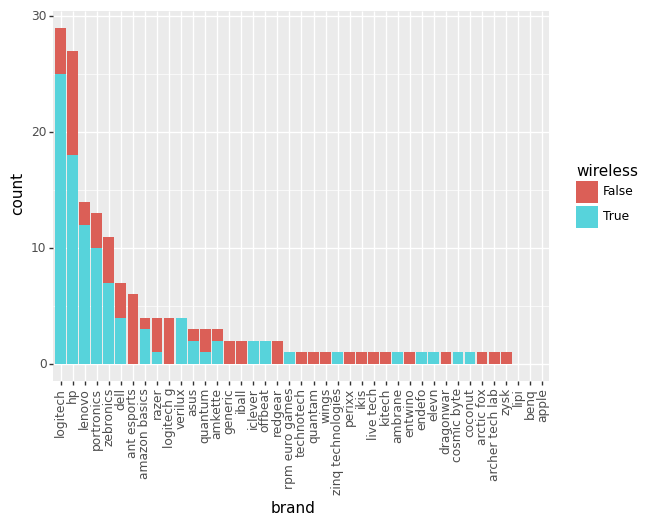

<ggplot: (8770881336004)>

In [15]:
order = df1["brand"].value_counts().index.to_list()

p9.ggplot(df1, p9.aes(x='brand', fill = 'wireless')) + \
    p9.geom_bar(stat = 'count') +\
    p9.scale_x_discrete(limits=order) +\
    p9.theme(axis_text_x = p9.element_text(angle=90))

In [5]:
def label_all(text):
    def label(x):
        temp = {'True':'have ' + text,'False':'dont have ' + text}
        return temp[x]
    return label

Text(0.5, 1.0, 'price histogram')

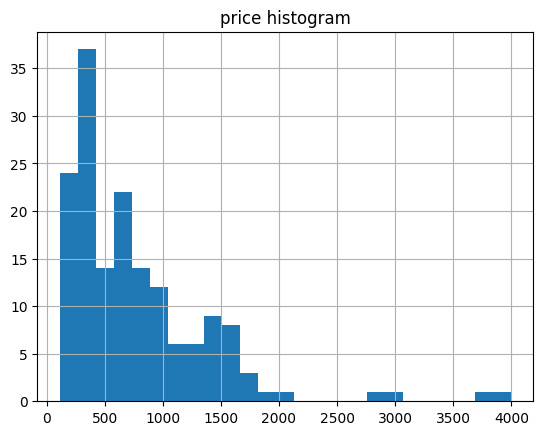

In [6]:
df1['price'].hist(bins=25)
plt.title('price histogram')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fa6866d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fa686c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fa686430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fa6a0190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fa6a0430>],
 'means': []}

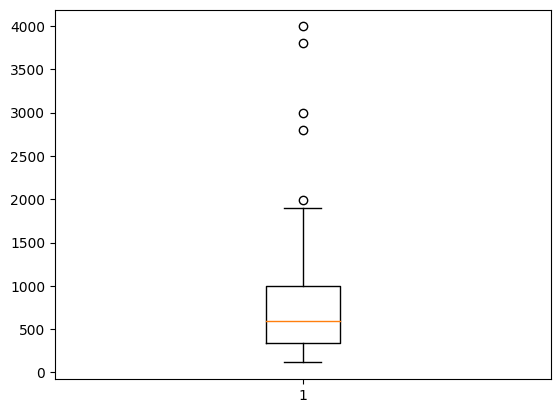

In [7]:
plt.boxplot(df1['price'])

making price label:

In [8]:
def f(x):
    if x < 600:
        return 'low'
    else:
        return 'high'
df1['priceCategory'] = df1['price'].apply(lambda x: f(x))


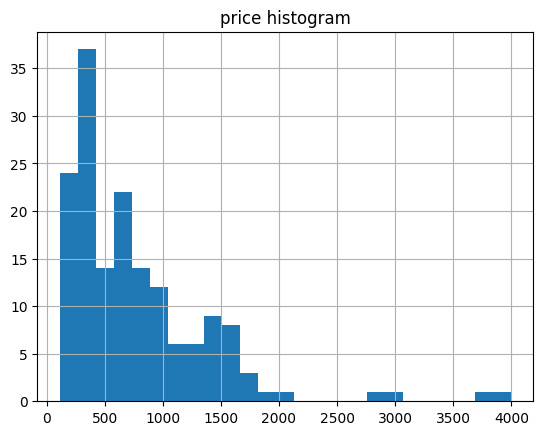

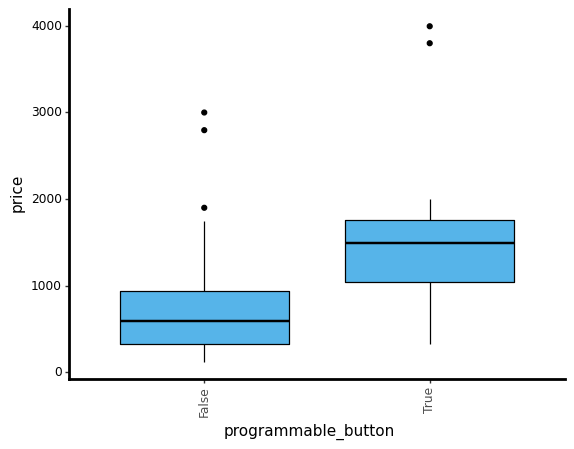

<ggplot: (8770887774458)>

In [19]:
p1 = (
    p9.ggplot(df1, p9.aes("programmable_button", "price"))
    + p9.geom_boxplot(colour="black", fill="#56B4E9")
    + p9.theme(
        axis_line_x=p9.element_line(size=2, colour="black"),
        axis_line_y=p9.element_line(size=2, colour="black"),
        panel_grid_major=p9.element_blank(),
        panel_grid_minor=p9.element_blank(),
        panel_border=p9.element_blank(),
        panel_background=p9.element_blank(),
        axis_text_x=p9.element_text(angle=90),
        axis_text_y=p9.element_text(colour="black"),
    )
)
p1

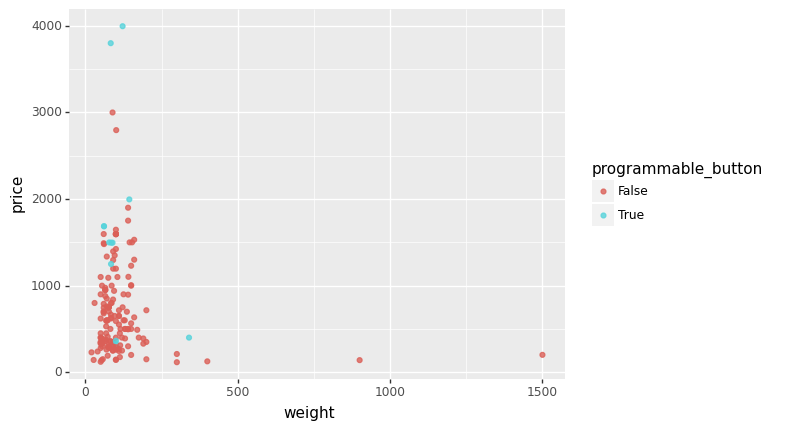

<ggplot: (8770887843057)>

In [20]:
# df1[['usb','wireless','ergonomic','portable','soundless','programmable_button','price']]
# sns.pairplot(df1)
p10 = (
    p9.ggplot(df1, p9.aes(x='weight', y='price', 
        color = 'programmable_button')) 
        + p9.geom_point(alpha =0.8)
)

p10

In [9]:
df1.to_csv('clean-mouses.csv')

# بخش ششم طبقه بندی

In [141]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [28]:
df1 = pd.read_csv('clean-mouses.csv').drop(['Unnamed: 0','brand','price'],axis=1)
df1.sample(5)
x = df1.iloc[:,0:-1]
y = df1.loc[:,'priceCategory']
x.head(1)

,movementDetectionTechnology,wireless,usb,bluetooth,ergonomic,portable,soundless,led_ligths,rechargeable,lightweight,programmable_button,weight
0,optical,False,True,False,False,False,False,False,False,False,False,109.0


In [29]:
# x['movementDetectionTechnology']
labelEncoderfirst = LabelEncoder()
labelEncoderfirst.fit(['optical','laser','optical, laser','trackball','radio frequency'])
x['movementDetectionTechnology'] = labelEncoderfirst.transform(x['movementDetectionTechnology'])

# labelEncoderlast = LabelEncoder()
# labelEncoderlast.fit(['low','high'])
# y = labelEncoderlast.transform(y)
x.head(2)


,movementDetectionTechnology,wireless,usb,bluetooth,ergonomic,portable,soundless,led_ligths,rechargeable,lightweight,programmable_button,weight
0,1,False,True,False,False,False,False,False,False,False,False,109.0
1,1,False,True,False,False,False,False,False,False,False,False,90.0


In [110]:
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted']

def mean_scores(scores):
    out = {}
    for key in scores.keys():
        out[key]= np.mean(scores[key])
    return out

def find_best(result):
    acc = 0
    index = -1
    for idx,r in enumerate(result):
        temp = r['test_accuracy']
        if temp > acc:
            acc = temp
            index =idx
    return (index,acc)

### logistic regression

In [113]:
hyperparameter = [0.0001,0.001,0.01,0.1,1]
result =[]
for c in hyperparameter:
    clf = make_pipeline(StandardScaler(),LogisticRegression(C=c,solver='liblinear'))
    scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
    result.append(mean_scores(scores))

(index,acc) = find_best(result)
print('best accuracy of logisticregression with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('hyper parameter: c = '+ str(hyperparameter[index]))
print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

best accuracy of logisticregression with 8-hold cross validation is:
79.52380952380953 %
hyper parameter: c = 0.1
------------------------------
fit_time  0.028614461421966553
score_time  0.026972800493240356
test_accuracy  0.7952380952380953
test_precision_weighted  0.808770037832538
test_recall_weighted  0.7952380952380953
test_f1_weighted  0.793228612782052


### SVM

In [124]:
hyperparameter = [0.0001,0.001,0.01,0.1,1]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
result =[]
for k in kernel:
    for c in hyperparameter:
        clf = make_pipeline(svm.SVC(C=c,kernel=k))
        scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
        result.append(mean_scores(scores))

(index,acc) = find_best(result)

print('best accuracy of svm with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('hyper parameter: c = '+ str(hyperparameter[int(index%len(hyperparameter))]))
print('hyper parameter: kernel = '+ kernel[int(np.floor(index/len(hyperparameter)))])

print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

best accuracy of svm with 8-hold cross validation is:
77.64880952380952 %
hyper parameter: c = 1
hyper parameter: kernel = linear
------------------------------
fit_time  0.8237262070178986
score_time  0.016640156507492065
test_accuracy  0.7764880952380953
test_precision_weighted  0.8177944624819624
test_recall_weighted  0.7764880952380953
test_f1_weighted  0.7682338494838494


### decision tree

In [132]:
hyperparameter = [5,6,7,8,9,10,11,12,13,14,15,16]
result =[]
for c in hyperparameter:
    clf = make_pipeline(StandardScaler(),tree.DecisionTreeClassifier(criterion="entropy",max_depth=c))
    scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
    result.append(mean_scores(scores))

(index,acc) = find_best(result)
print('best accuracy of decision tree with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('hyper parameter: max depth = '+ str(hyperparameter[index]))
print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

best accuracy of decision tree with 8-hold cross validation is:
78.86904761904762 %
hyper parameter: max depth = 12
------------------------------
fit_time  0.013138800859451294
score_time  0.013396143913269043
test_accuracy  0.7886904761904762
test_precision_weighted  0.8041215959965959
test_recall_weighted  0.7886904761904762
test_f1_weighted  0.7835983874558423


### KNN

In [135]:
hyperparameter = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
result =[]
for c in hyperparameter:
    clf = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=c))
    scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
    result.append(mean_scores(scores))

(index,acc) = find_best(result)
print('best accuracy of KNN with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('hyper parameter: n_neighbors = '+ str(hyperparameter[index]))
print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

best accuracy of KNN with 8-hold cross validation is:
83.18452380952381 %
hyper parameter: n_neighbors = 1
------------------------------
fit_time  0.016671031713485718
score_time  0.021292656660079956
test_accuracy  0.8318452380952381
test_precision_weighted  0.8359424603174603
test_recall_weighted  0.8318452380952381
test_f1_weighted  0.8314840130629604


### random forest regressor

In [138]:
hyperparameter = [1,2,3,4,5,6]
result =[]
for c in hyperparameter:
    clf = make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=c, random_state=0))
    scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
    result.append(mean_scores(scores))

(index,acc) = find_best(result)
print('best accuracy of random forest with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('hyper parameter: max_depth = '+ str(hyperparameter[index]))
print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

best accuracy of random forest with 8-hold cross validation is:
77.64880952380952 %
hyper parameter: max_depth = 3
------------------------------
fit_time  0.1870291829109192
score_time  0.02338549494743347
test_accuracy  0.7764880952380953
test_precision_weighted  0.7925550144300145
test_recall_weighted  0.7764880952380953
test_f1_weighted  0.7731552346338993


### perceptron

In [140]:
result =[]
clf = make_pipeline(StandardScaler(),Perceptron())
scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
result.append(mean_scores(scores))

(index,acc) = find_best(result)
print('best accuracy of perceptron with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

best accuracy of perceptron with 8-hold cross validation is:
69.58333333333333 %
------------------------------
fit_time  0.013980001211166382
score_time  0.010817408561706543
test_accuracy  0.6958333333333333
test_precision_weighted  0.7355304913340628
test_recall_weighted  0.6958333333333333
test_f1_weighted  0.6853373267543243


### mlp classifier

In [143]:
hyperparameter = [(10,),(50,),(10,20),(20,10),(10,20,10)]
result =[]
for c in hyperparameter:
    clf = make_pipeline(StandardScaler(),MLPClassifier(hidden_layer_sizes=c,activation='logistic'))
    scores = cross_validate(clf,x,y,cv=8,scoring=scoring)
    result.append(mean_scores(scores))

(index,acc) = find_best(result)
print('best accuracy of MLPClassifier with 8-hold cross validation is:')
print(str(acc*100) + ' %')
print('hyper parameter: hidden_layer_sizes = '+ str(hyperparameter[index]))
print('------------------------------')
for key in result[index].keys():
    print(key+'  ' + str(result[index][key]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

best accuracy of MLPClassifier with 8-hold cross validation is:
76.42857142857142 %
hyper parameter: hidden_layer_sizes = (50,)
------------------------------
fit_time  0.3862118721008301
score_time  0.01312604546546936
test_accuracy  0.7642857142857142
test_precision_weighted  0.779718475968476
test_recall_weighted  0.7642857142857142
test_f1_weighted  0.7614266408144286


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# fit_time=[0.028614461421966553,0.8237262070178986,0.013138800859451294,0.016671031713485718,0.1870291829109192,0.013980001211166382,0.3862118721008301]
# score_time = [0.026972800493240356,0.016640156507492065,0.013396143913269043,0.021292656660079956,0.02338549494743347,0.010817408561706543,0.01312604546546936]
# test_accuracy=[0.7952380952380953,0.7764880952380953,0.7886904761904762,0.8318452380952381,0.7764880952380953,0.6958333333333333,0.7642857142857142]
# test_precision_weighted=[0.808770037832538,0.8177944624819624,0.8041215959965959,0.8359424603174603,0.7925550144300145,0.7355304913340628,0.779718475968476]
# test_f1_weighted=[0.793228612782052,0.7682338494838494,0.7835983874558423,0.8314840130629604,0.7731552346338993,0.6853373267543243,0.7614266408144286]
# model = ['logisticregression','svm','decision tree','KNN','random forest','perceptron','MLPClassifier']

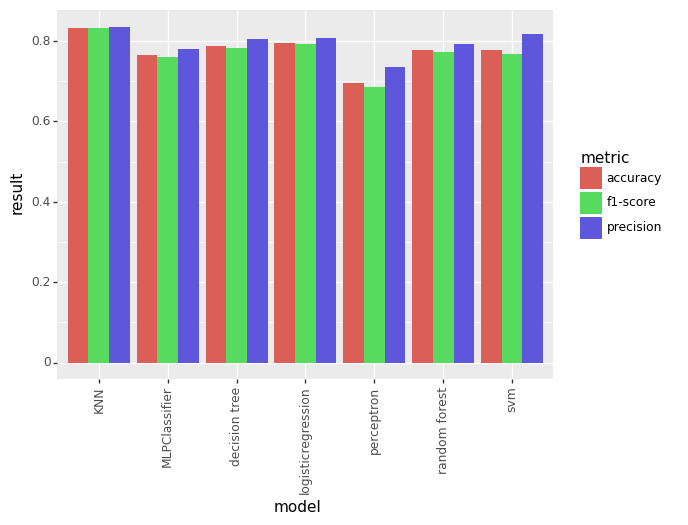

<ggplot: (8762635245650)>

In [27]:
df_result = pd.read_csv('result.csv')

p9.ggplot(df_result, p9.aes(x='model',y = 'result',fill='metric')) + \
    p9.geom_bar(stat="identity",position=p9.position_dodge()) +\
    p9.theme(axis_text_x = p9.element_text(angle=90))


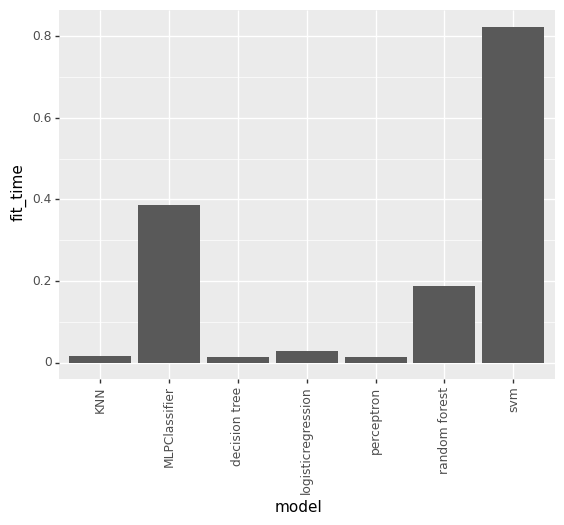

<ggplot: (8762636021745)>

In [29]:
df_result = pd.read_csv('fit-time.csv')

p9.ggplot(df_result, p9.aes(x='model',y = 'fit_time')) + \
    p9.geom_bar(stat="identity",position=p9.position_dodge()) +\
    p9.theme(axis_text_x = p9.element_text(angle=90))